In [ ]:
import pandas as pd
import numpy as np

X = pd.read_csv('/content/drive/MyDrive/team3_project3/X.csv')
X_scaled = pd.read_csv('/content/drive/MyDrive/team3_project3/X_scaled.csv')
X_scaled_date = pd.read_csv('/content/drive/MyDrive/team3_project3/X_scaled_date.csv')
X_scaled_month = pd.read_csv('/content/drive/MyDrive/team3_project3/X_scaled_month.csv')
X_scaled_total = pd.read_csv('/content/drive/MyDrive/team3_project3/X_scaled_total.csv')
X_total = pd.read_csv('/content/drive/MyDrive/team3_project3/X_scaled_total.csv')
X_date = pd.read_csv('/content/drive/MyDrive/team3_project3/X_date.csv')
X_month = pd.read_csv('/content/drive/MyDrive/team3_project3/X_month.csv')
X_trend = pd.read_csv('/content/drive/MyDrive/team3_project3/X_Trend.csv')
X_scaled_trend = pd.read_csv('/content/drive/MyDrive/team3_project3/X_scaled_Trend.csv')

time_s = pd.read_csv('/content/drive/MyDrive/team3_project3/time_s.csv')
time_y = pd.read_csv('/content/drive/MyDrive/team3_project3/time_y.csv')

y = pd.read_csv('/content/drive/MyDrive/team3_project3/y.csv')
y_scaled = pd.read_csv('/content/drive/MyDrive/team3_project3/y_removed.csv')

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# #한글 글꼴 설치
# import matplotlib.pyplot as plt
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# import matplotlib.font_manager as fm
# fe = fm.FontEntry(
#     fname= '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
# fm.fontManager.ttflist.insert(0, fe)
# plt.rcParams.update({'font.size':10, 'font.family':'NanumGothic'})

In [ ]:
# 나무의 크기
print(X.shape, y.shape)
print(X_scaled.shape, y_scaled.shape)
# 
print(X_scaled_total.shape, X_total.shape) 
print()

print(X_scaled_date.shape, X_date.shape) 
print(X_scaled_month.shape, X_month.shape)
print()

print(X_trend.shape, X_scaled_trend.shape)
print(time_s.shape, time_y.shape) 

(2207, 4) (2207, 1)
(2200, 4) (2200, 1)
(2200, 10) (2200, 10)

(2200, 178) (2207, 178)
(2200, 30) (2207, 30)

(2207, 4) (2200, 4)
(89, 2207) (89, 2207)


In [ ]:
X.head(3)

,수고(m),수관폭1(min),수관폭2(max),수관폭평균
0,275.0,287.0,292.0,289.5
1,293.0,284.0,336.0,310.0
2,300.0,392.0,450.0,421.0


In [ ]:
y.head(3)

,착과량(int)
0,692
1,534
2,634


In [ ]:
X_total.head(3)

,새순mean,새순std,새순diff,새순min,새순max,엽록소mean,엽록소std,엽록소diff,엽록소min,엽록소max
0,-1.348076,-1.228196,1.187680,0.808606,-1.259189,0.415442,-0.932766,0.938635,0.482688,0.362060
1,-0.852161,-0.245731,0.118096,-1.156704,-0.613180,0.615065,1.279782,-1.614464,0.576981,0.805248
2,-1.143098,-0.942796,0.895975,0.481054,-1.000786,0.557099,-0.652148,0.159998,0.570106,0.556750


In [ ]:
# 단순회귀분석 함수화
def linear(x, y, n=0): # 기본매개변수로 raw값표현
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3) # x, y 데이터 input
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)

  if n==0: # 기본 출력 포맷
    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))  
    print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))
    print('절편 값:',lr.intercept_)
    print('회귀 계수값:', np.round(lr.coef_, 2))

  if n != 0: # 0이 아닌 다른 값을 추가하면, 반올림한 값 출력
    list_con = []
    for i in range(len(lr.coef_[0])):
      list_con.append(round(lr.coef_[0][i],2))
    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))  
    print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))
    print('절편 값:',lr.intercept_)  
    print('회귀 계수값:', list_con)

In [ ]:
# sclaled_linear_rgression
def slinear(x, y, n=0):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3) # x, y 데이터 input

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  pred_train = lr.predict(X_train)
  pred_test = lr.predict(X_test)

  mse_train = mean_squared_error(y_train, pred_train)
  mse_test = mean_squared_error(y_test, pred_test)
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)

  print('RMSE_train : {0:.3F}'.format(rmse_train))
  print('RMSE_test : {0:.3F}'.format(rmse_test))    
  print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
  print('절편 값:',lr.intercept_)
  print('회귀 계수값:', np.round(lr.coef_, 2))

In [ ]:
def poly(x, y, n):
  degrees = [i for i in range(1,n+1,1)] # n : 특성공학의 차수

  for i in range(len(degrees)):
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3) # x,y 데이터 input
    pipeline.fit(X_train, y_train)
    pred = pipeline.predict(X_test)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} RMSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))

In [ ]:
# 수관

In [ ]:
linear(X,y)

MSE : 46587.051 , RMSE : 215.840
Variance score : -0.003
절편 값: [396.25841362]
회귀 계수값: [[-0.23 -0.14  0.25  0.06]]


In [ ]:
slinear(X,y)

RMSE_train : 220.036
RMSE_test : 215.840
Variance score : -0.003
절편 값: [396.25841362]
회귀 계수값: [[-0.23 -0.14  0.25  0.06]]


In [ ]:
# 수관-정규화

In [ ]:
linear(X_scaled, y_scaled)

MSE : 48709.657 , RMSE : 220.703
Variance score : 0.002
절편 값: [407.16277394]
회귀 계수값: [[-3.43000000e+00 -1.86362646e+15 -1.93422296e+15  3.64443762e+15]]


In [ ]:
slinear(X_scaled, y_scaled)

RMSE_train : 217.948
RMSE_test : 220.703
Variance score : 0.002
절편 값: [407.16277394]
회귀 계수값: [[-3.43000000e+00 -1.86362646e+15 -1.93422296e+15  3.64443762e+15]]


In [ ]:
# 다항회귀

In [ ]:
poly(X,y,3)


Degree 1 회귀 계수는 [[-0.23 -0.14  0.25  0.06]] 입니다.
Degree 1 RMSE 는 221.043725452865 입니다.
Variance score : -0.003

Degree 2 회귀 계수는 [[-3.10000000e-01  2.99720389e+07  2.99720346e+07 -5.99440719e+07
   0.00000000e+00  2.48834767e+09  2.48834767e+09 -4.97669535e+09
  -4.85655729e+09  2.58064674e+09  9.17892444e+09  7.43720403e+09
  -1.54085982e+10  1.06838029e+09]] 입니다.
Degree 2 RMSE 는 221.16671482269672 입니다.
Variance score : -0.007

Degree 3 회귀 계수는 [[ 2.60000000e+00  1.12817980e+05  1.12800400e+05 -2.25618600e+05
   2.00000000e-02 -4.18337800e+04 -4.18337600e+04  8.36674800e+04
  -3.58830400e+04 -4.85387100e+04  4.00718100e+04 -1.26556600e+04
  -6.38288000e+03  6.33885000e+04 -0.00000000e+00  3.59637180e+05
   3.59637180e+05 -7.19274360e+05  6.69762784e+06  9.17846582e+06
  -5.00745881e+06  2.48083798e+06  3.42612090e+06 -1.67755937e+07
   1.36112833e+07  6.87111685e+06 -4.59356541e+07  4.31585413e+06
   7.16440071e+06  1.32847179e+07  1.10560206e+07 -9.71488598e+06
  -4.89357674e+07  4.82

In [ ]:
poly(X_scaled, y_scaled, 3)


Degree 1 회귀 계수는 [[-3.14000000e+00 -1.62908280e+15 -1.69079450e+15  3.18577289e+15]] 입니다.
Degree 1 RMSE 는 218.7011332485601 입니다.
Variance score : 0.003

Degree 2 회귀 계수는 [[-9.60000000e-01  4.48296365e+12  4.65278392e+12 -8.76671463e+12
  -7.52000000e+00 -2.02717828e+14 -2.10397033e+14  3.96427339e+14
  -2.53164307e+14  4.87933164e+13  1.13631474e+14  3.23349625e+14
  -1.00514793e+15  7.45943557e+14]] 입니다.
Degree 2 RMSE 는 219.02330969994628 입니다.
Variance score : 0.002

Degree 3 회귀 계수는 [[  6.03 -20.53  23.05   1.73  -1.21 -21.75  20.37  -0.31   0.67  -8.5
   -4.17  10.09   1.01  -1.6   -4.86   4.73   2.03   3.49  -8.18   5.91
   -1.05  -1.94   1.99   0.52  12.15 -15.29  -1.9   12.37  -1.26  -1.64
   -8.94   1.58   0.2   -0.73]] 입니다.
Degree 3 RMSE 는 219.92280200861128 입니다.
Variance score : 0.016


In [ ]:
# 특성공학이 쓸모없음. # 새순과 엽록소에 영향을 받을 것 같아서 새순과 엽록소만 넣고서 확인해봐야겠다는 생각이 듬.

In [ ]:
poly(X_total, y_scaled, 3) # 독립변수, 종속변수, 차수
# n=1차 일때, 회귀계수 및 variance score가 우수함.


Degree 1 회귀 계수는 [[ -65.32 -114.41   15.65   -2.97  -21.97  -41.12   -1.65   -1.46   20.45
    20.95]] 입니다.
Degree 1 RMSE 는 42.3659143347784 입니다.
Variance score : 0.965

Degree 2 회귀 계수는 [[-7.98300000e+01 -8.31900000e+01 -2.08477862e+13  6.18873887e+12
  -1.56896507e+13 -5.40300000e+01  5.00000000e-01 -6.65238229e+12
   4.95969917e+13 -4.88750780e+13 -1.56540000e+02 -2.87290000e+02
  -3.30944918e+13  9.82421664e+12 -2.49062904e+13 -2.62820000e+02
  -4.56500000e+01  1.14950077e+13 -8.57012987e+13  8.44538655e+13
  -2.19810000e+02  4.52047845e+13 -1.34191997e+13  3.40202682e+13
  -2.63910000e+02  1.02900000e+01  1.18131090e+12 -8.80729101e+12
   8.67909566e+12 -2.57210416e+14 -4.56869193e+13 -1.65335774e+14
   8.51297609e+13 -2.63137412e+11 -1.65373412e+12 -8.27967621e+13
   3.62723937e+13  3.62282238e+13 -1.00227495e+14 -2.52710698e+13
   7.81132689e+10  6.84951821e+10  2.77278852e+13 -1.38711213e+13
   2.12498312e+13  6.40670525e+13 -1.98032253e+11  2.00199130e+12
  -8.65160886e+13  5.1

In [ ]:
# 새순과 엽록소의 통계량이 변수
linear(X_total, y_scaled)

MSE : 1698.162 , RMSE : 41.209
Variance score : 0.965
절편 값: [405.92532175]
회귀 계수값: [[ -65.32 -114.41   15.65   -2.97  -21.97  -41.12   -1.65   -1.46   20.45
    20.95]]


In [ ]:
slinear(X_total, y_scaled)

RMSE_train : 42.147
RMSE_test : 41.209
Variance score : 0.965
절편 값: [405.92532175]
회귀 계수값: [[ -65.32 -114.41   15.65   -2.97  -21.97  -41.12   -1.65   -1.46   20.45
    20.95]]


In [ ]:
# 새순과 엽록소의 통계량이 변수 (정규화)
linear(X_scaled_total, y_scaled)

MSE : 1698.162 , RMSE : 41.209
Variance score : 0.965
절편 값: [405.92532175]
회귀 계수값: [[ -65.32 -114.41   15.65   -2.97  -21.97  -41.12   -1.65   -1.46   20.45
    20.95]]


In [ ]:
slinear(X_scaled_total, y_scaled)

RMSE_train : 42.147
RMSE_test : 41.209
Variance score : 0.965
절편 값: [405.92532175]
회귀 계수값: [[ -65.32 -114.41   15.65   -2.97  -21.97  -41.12   -1.65   -1.46   20.45
    20.95]]


In [ ]:
# 새순 + 엽록소 월별 통계량 변수

In [ ]:
linear(X_month, y) # raw

MSE : 1748.672 , RMSE : 41.817
Variance score : 0.962
절편 값: [1429.69494174]
회귀 계수값: [[-150.35  133.78   64.13  -15.75  -10.48  -80.61   71.56  -66.25   55.29
    30.03   51.1   -37.96  -33.84   17.27  -13.94 -150.35  133.78  -29.12
   -15.75  -10.48  -80.61   71.56   22.12   55.29   30.03   51.1   -37.96
    -1.69   17.27  -13.94]]


In [ ]:
linear(X_scaled_month, y_scaled) # scaled

MSE : 1715.016 , RMSE : 41.413
Variance score : 0.965
절편 값: [405.8744495]
회귀 계수값: [[-365.03  356.99    8.69   -0.83  -79.77  -49.84   54.47  -18.77    8.14
    80.46   84.43  -84.47   -6.77    3.9     2.37 -365.03  356.99  -14.3
    -0.83  -79.77  -49.84   54.47   -0.41    8.14   80.46   84.43  -84.47
     0.9     3.9     2.37]]


In [ ]:
# day tendency

In [ ]:
linear(X_date, y)

MSE : 2050.647 , RMSE : 45.284
Variance score : 0.956
절편 값: [1458.0498831]
회귀 계수값: [[ -53.23  -19.3   -51.89  -21.29   11.95  -98.16  -53.55    3.71  -61.32
   -41.05   -8.3    31.96   45.48   35.27   45.09   -8.25   22.36   24.29
    32.22  -30.57  -26.44  -13.67    4.66   36.12   20.34  -37.61   21.5
  -139.47  -18.65   19.31   69.09   16.27   58.37  -11.84  -58.97   20.59
     5.76  -45.45  -26.71   94.46  -90.12  -35.5   -74.46    4.37   15.76
     6.21  -13.02  -10.9    41.85  -43.58    9.87   22.96   32.64   20.89
    43.36  -59.2   -15.14   13.17  -61.85  -27.87   58.27   45.84   28.05
    -8.21  -17.86   42.37  -42.6    54.46   45.48    2.36  -25.28  -54.18
    -7.6    53.11   30.42   31.32    3.69  -71.41   -4.25   54.08    0.78
     4.54  -30.16  -22.43  -27.41   22.53   -6.21   10.31    3.03   14.84
   -12.    -20.05   34.81    4.59  -20.86   -1.7    20.15  -24.89   -1.63
    14.08  -16.31   36.44  -51.9    39.82   13.72   -5.17  -49.91   23.25
   -34.12   25.23   15.97  -23

In [ ]:
linear(X_scaled_date, y_scaled)

MSE : 2003.595 , RMSE : 44.762
Variance score : 0.959
절편 값: [405.77614536]
회귀 계수값: [[  -8.31  -14.65  -23.36  -27.73  -16.02  -67.71  -57.54  -14.87  -38.65
   -45.6    11.09   22.97   44.71   -5.59    5.9   -10.42   11.28   11.99
    23.45   -9.11  -19.15    5.92    0.66   13.85   16.9     3.68   22.4
   -38.56   -5.46   -3.01   23.96   15.51    4.11   -5.55  -37.62   13.94
     0.87  -32.72    7.18   26.78   -7.98   -7.3    -9.98   10.73    7.78
   -14.01   -0.32   -8.18    2.83   -4.86   -5.44    9.97    8.97    0.91
     1.35   -2.58    8.59   -2.25  -15.62  -12.09    0.48    3.21   10.25
     0.8    -5.79    3.32   -7.09    4.67    8.75    2.34   -2.07   -3.97
    -1.24    6.33    3.41   -1.07    1.09   -1.81    1.63    6.47   -1.87
    -1.8    -3.47   -0.8    -3.65    2.14   -0.78    1.52    4.79  165.6
  -166.61  -30.2   125.46   88.62 -190.28   13.27  -34.73    9.35  -50.35
   169.06 -153.71   80.9  -118.56  134.24   61.84  -10.98 -169.97   98.8
  -178.81  194.75  129.9  -208.2

In [ ]:
# 수많은 계수가 나와서 과적합의 위험성이 있음. # 양수와 음수, 절댓값이 의미하는 바가 무엇인지 모르겠음. # 시기와 크기랑 연관이 있나.

In [ ]:
# 새순과 엽록소로 분리 (정규화)
t_s = X_scaled_date.iloc[:,:89]
print(t_s.columns[88]) # 분리확인
t_y = X_scaled_date.iloc[:,89:]
print(t_y.columns[0])

2022-11-28 새순
2022-09-01 엽록소


In [ ]:
# 새순(정규화)
linear(t_s, y_scaled, 1) # 새순의 날짜데이터만으로도 설명력이 있음.
# 양수와 음수, 절대값의 관계는 무엇일까? 

MSE : 1849.891 , RMSE : 43.010
Variance score : 0.962
절편 값: [406.05521405]
회귀 계수값: [0.42, -4.84, -24.65, -33.78, -21.41, -70.99, -55.1, -8.09, -32.78, -51.23, 3.46, 21.66, 37.84, -2.47, 9.04, -9.89, 12.28, 17.56, 18.29, -2.36, -31.6, 1.15, -2.99, 11.62, 17.05, 1.78, 23.69, -37.7, -4.2, -6.2, 24.74, 14.84, 1.76, -8.48, -26.51, 11.34, 3.05, -35.55, 8.88, 31.65, -3.3, -6.54, -14.3, 10.73, 5.76, -12.56, -0.98, -8.16, -1.4, -4.66, -1.9, 11.38, 10.89, 1.72, 2.07, -1.72, 9.25, -3.07, -13.52, -13.81, -0.43, 4.39, 11.09, 0.47, -5.26, 2.77, -7.01, 3.42, 9.1, 2.88, -1.74, -3.96, -1.4, 5.34, 1.88, -1.55, 1.45, -1.09, 1.39, 6.89, -1.78, -2.33, -3.62, -1.61, -3.03, 2.51, -0.2, 1.41, 4.48]


In [ ]:
# 엽록소(정규화)
linear(t_y, y_scaled, 1) # 엽록소의 날짜데이터만으로는 설명력이 없음.

MSE : 51944.345 , RMSE : 227.913
Variance score : -0.064
절편 값: [407.22223326]
회귀 계수값: [198.98, -174.16, 539.1, -225.27, -400.49, 205.28, -264.69, -43.13, -207.42, 768.67, -455.32, -656.28, 1177.26, 257.73, -767.24, -344.56, 1244.0, -617.2, -507.37, 756.3, -413.65, 815.08, -748.55, 681.5, -567.13, -409.94, 920.18, -554.77, 268.77, -483.43, -65.43, 192.48, 271.16, -605.67, -45.0, -275.16, 890.79, -737.34, 343.44, -37.09, -257.09, 1079.12, -1040.35, 404.01, 72.8, 170.71, -638.24, 669.9, -139.13, -103.31, -327.24, -3.85, 1009.75, -630.49, -47.37, -11.36, -367.54, 92.37, -662.68, 892.57, 730.57, -398.96, -439.08, 184.43, -389.1, 100.47, -120.09, -111.78, 409.08, 375.08, -158.6, 358.03, -663.24, -156.54, -463.5, 1023.68, -159.08, -429.92, 272.24, -298.4, 118.34, 145.56, 508.37, -1063.64, 524.62, -389.03, -178.82, 616.12, -33.63]


In [ ]:
# 수관 + 새순 + 엽록소 (정규화)

In [ ]:
X_concat = pd.concat([X_scaled, X_scaled_total], axis=1)

In [ ]:
X_concat.head(5)

,수고(m),수관폭1(min),수관폭2(max),수관폭평균,새순mean,새순std,새순diff,새순min,새순max,엽록소mean,엽록소std,엽록소diff,엽록소min,엽록소max
0,0.869490,-0.426210,-0.971593,-0.733604,-1.348076,-1.228196,1.187680,0.808606,-1.259189,0.415442,-0.932766,0.938635,0.482688,0.362060
1,1.370746,-0.471461,-0.332135,-0.417362,-0.852161,-0.245731,0.118096,-1.156704,-0.613180,0.615065,1.279782,-1.614464,0.576981,0.805248
2,1.565679,1.157576,1.324643,1.294972,-1.143098,-0.942796,0.895975,0.481054,-1.000786,0.557099,-0.652148,0.159998,0.570106,0.556750
3,1.259356,0.795568,0.292790,0.562216,-0.865386,-1.018714,0.993210,1.136158,-0.871584,0.264509,0.292666,0.007560,0.259612,0.262418
4,1.732765,0.569313,-0.012406,0.284541,-0.075229,-0.231629,0.312566,0.808606,-0.096373,-0.157654,0.297098,-0.030569,-0.163311,-0.161562


In [ ]:
linear(X_concat, y_scaled)

MSE : 1695.470 , RMSE : 41.176
Variance score : 0.965
절편 값: [405.93040392]
회귀 계수값: [[-1.400e-01  5.600e-01 -1.100e-01  2.300e-01 -6.544e+01 -1.149e+02
   1.537e+01 -2.880e+00 -2.156e+01 -4.140e+01 -1.610e+00 -1.420e+00
   2.058e+01  2.108e+01]]


In [ ]:
linear(X_concat, y_scaled, 1)

MSE : 1695.470 , RMSE : 41.176
Variance score : 0.965
절편 값: [405.93040392]
회귀 계수값: [-0.14, 0.56, -0.11, 0.23, -65.44, -114.9, 15.37, -2.88, -21.56, -41.4, -1.61, -1.42, 20.58, 21.08]


In [ ]:
### PCA
# 주성분분석 함수화
def pcatotal(data): # x는 독립변수 데이터
  pca = PCA(n_components=2)
  pca.fit(data)
  X_pca = pca.transform(data)
  print(pca.explained_variance_ratio_)
  print()
  linear(X_pca, y_scaled, 1)
  print()

  df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
  df_pca['target']= y_scaled['착과량(int)']

  plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['target'])
  plt.xlabel('PCA1')
  plt.ylabel('PCA2')
  plt.colorbar(label='target')
  plt.show()

  # 주성분 1, 주성분 2, 연속형 종속변수 값 가져오기
  pc1 = df_pca['PCA1']
  pc2 = df_pca['PCA2']
  z = df_pca['target']

  # 3D 산점도 그래프 생성
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # 산점도 그리기
  ax.scatter(pc1, pc2, z, c=z, cmap='rainbow')

  # 축 레이블 설정
  ax.set_xlabel('PCA1')
  ax.set_ylabel('PCA2')
  ax.set_zlabel('target')

  # 그래프 표시
  plt.show()

In [ ]:
# 전체 날짜의 정규화

In [ ]:
# 전체에 대한 정규화된 통계량

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_) # 0.9605617099999999 (원본 데이터의 변동성을 96프로 설명가능)

[0.78951299 0.17104872]


In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
df_pca['target']= y_scaled['착과량(int)']
df_pca.head(3)

,PCA1,PCA2,target
0,0.839604,1.238370,692
1,0.167941,1.534713,534
2,-2.597184,0.685501,634


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


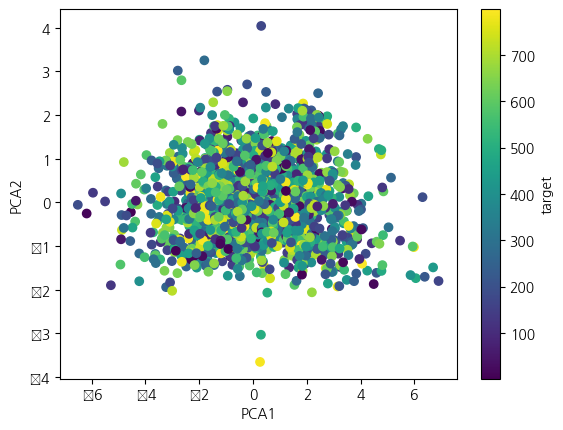

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['target'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='target')
plt.show()

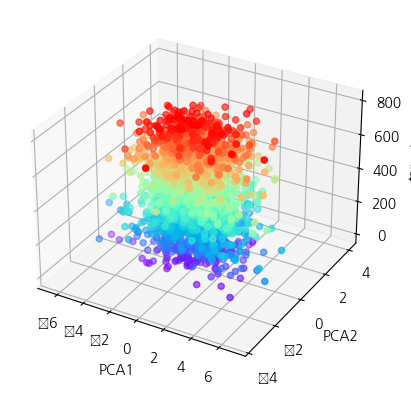

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 주성분 1, 주성분 2, 연속형 종속변수 값 가져오기
pc1 = df_pca['PCA1']
pc2 = df_pca['PCA2']
z = df_pca['target']

# 3D 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(pc1, pc2, z, c=z, cmap='rainbow')

# 축 레이블 설정
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('target')

# 그래프 표시
plt.show()

In [ ]:
# 월별 통계량 # PCA + LR

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_month)
X_pca = pca.transform(X_month)
print(pca.explained_variance_ratio_) # 0.99486575 (원본 데이터의 변동성을 99프로 설명가능)

[0.98494001 0.00992574]


In [ ]:
linear(X_pca, y, 1) 
# 스케일링을 하지 않아서 PCA1축 하나로 과편향된 설명력이 제공

MSE : 2024.839 , RMSE : 44.998
Variance score : 0.956
절편 값: [405.5013376]
회귀 계수값: [0.14, -174.19]


In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
df_pca['target']= y_scaled['착과량(int)']
df_pca.head(3)

,PCA1,PCA2,target
0,-4.691330,-1.577101,692.0
1,-7.932475,-0.485036,534.0
2,-6.636677,-1.235571,634.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


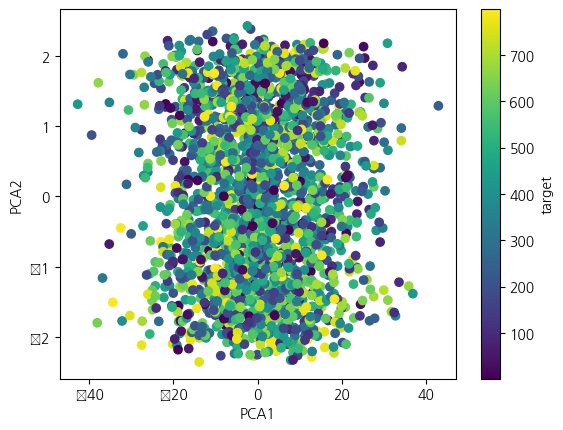

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['target'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='target')
plt.show()

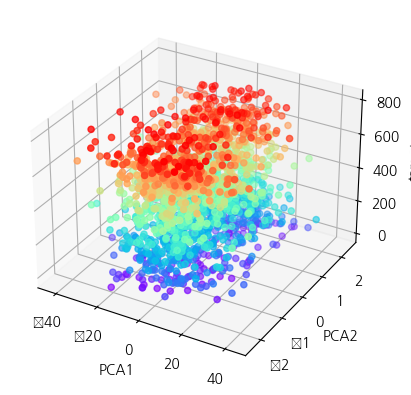

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 주성분 1, 주성분 2, 연속형 종속변수 값 가져오기
pc1 = df_pca['PCA1']
pc2 = df_pca['PCA2']
z = df_pca['target']

# 3D 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(pc1, pc2, z, c=z, cmap='rainbow')

# 축 레이블 설정
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('target')

# 그래프 표시
plt.show()

In [ ]:
# 월별 통계량 (정규화) # PCA + LR

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled_month)
X_pca = pca.transform(X_scaled_month)
print(pca.explained_variance_ratio_) # 0.86642427

[0.59482472 0.27159955]


In [ ]:
linear(X_pca, y_scaled, 1) # 적은 분산수치만으로도 충분히 높은 r2을 갖는 것만으로도 의미가 있다고 봐야하나

MSE : 2760.501 , RMSE : 52.540
Variance score : 0.943
절편 값: [405.41623589]
회귀 계수값: [0.76, -74.44]


In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
df_pca['target']= y_scaled['착과량(int)']
df_pca.head(3)

,PCA1,PCA2,target
0,-1.689674,-3.670712,692
1,-2.622149,-0.628497,534
2,-2.308528,-2.851257,634


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


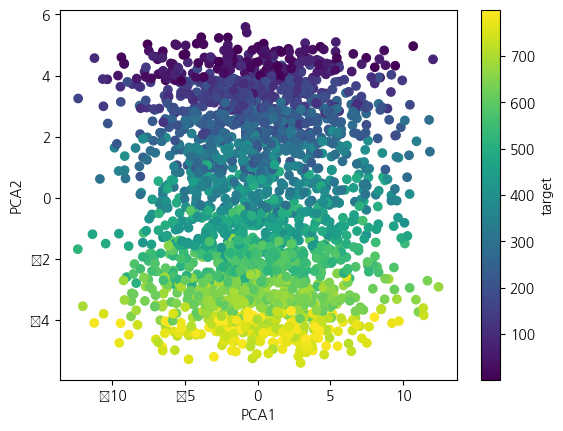

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['target'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='target')
plt.show()

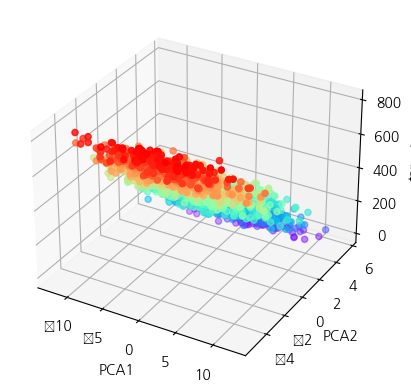

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 주성분 1, 주성분 2, 연속형 종속변수 값 가져오기
pc1 = df_pca['PCA1']
pc2 = df_pca['PCA2']
z = df_pca['target']

# 3D 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(pc1, pc2, z, c=z, cmap='rainbow')

# 축 레이블 설정
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('target')

# 그래프 표시
plt.show()  ### 이후부터는 무조건 scaling ###

In [ ]:
# randomforestregressor

In [ ]:
# 정규화된 통계량(새순+엽록소)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled_total, y_scaled, test_size=0.3, random_state=3)
y_train = y_train.values.ravel()

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=3)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, pred)

print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))
print('RMSE:', np.sqrt(mse))

Variance score : 0.968
RMSE: 39.75967330028153


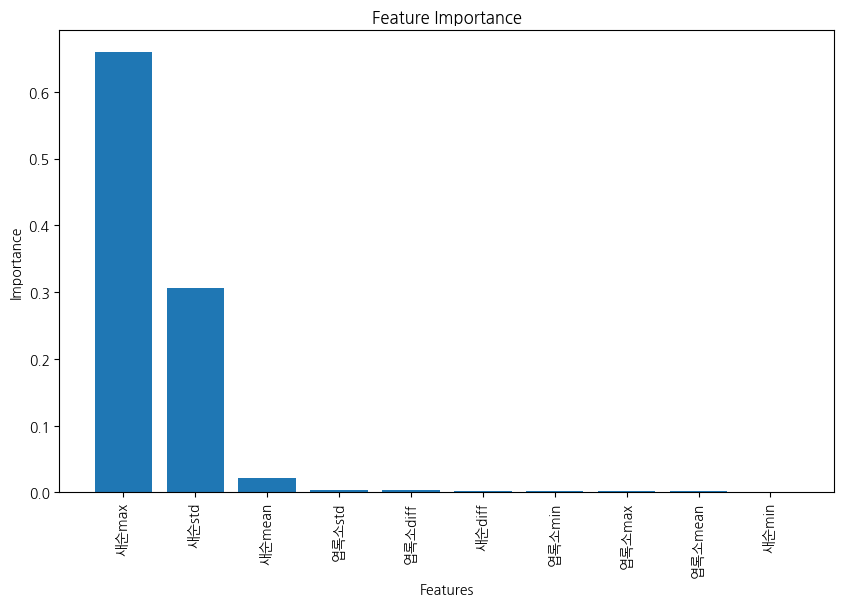

In [ ]:
importances = rfr.feature_importances_

# 피처 이름 가져오기
feature_names = X_scaled_total.columns

# 중요도를 내림차순으로 정렬하여 인덱스 얻기
indices = np.argsort(importances)[::-1]

# 바 그래프로 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# 새순만으로도 모델이 설명될 수도 있겠네?
X_s = X_scaled_total.iloc[:,0:5]

linear(X_s, y_scaled) # 새순만으로도 모델 설명이 가능하고, 잘 맞음.

MSE : 1691.820 , RMSE : 41.132
Variance score : 0.965
절편 값: [405.92071886]
회귀 계수값: [[ -67.05 -115.25   14.49   -2.55  -20.27]]


In [ ]:
X_s.head(3)

,새순mean,새순std,새순diff,새순min,새순max
0,-1.348076,-1.228196,1.187680,0.808606,-1.259189
1,-0.852161,-0.245731,0.118096,-1.156704,-0.613180
2,-1.143098,-0.942796,0.895975,0.481054,-1.000786


In [ ]:
X_y = X_scaled_total.iloc[:,5:]

linear(X_y, y_scaled) # 엽록소만으로는 모델 설명력이 없음.

MSE : 49041.833 , RMSE : 221.454
Variance score : -0.005
절편 값: [407.19106115]
회귀 계수값: [[-261.12    8.7    -1.99  130.03  132.22]]


In [ ]:
# 새순만 RFR을 실행
X_train, X_test, y_train, y_test = train_test_split(X_s, y_scaled, test_size=0.3, random_state=3)
y_train = y_train.values.ravel()

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=3)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, pred)

print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))
print('RMSE:', np.sqrt(mse))

Variance score : 0.967
RMSE: 40.02568388961908


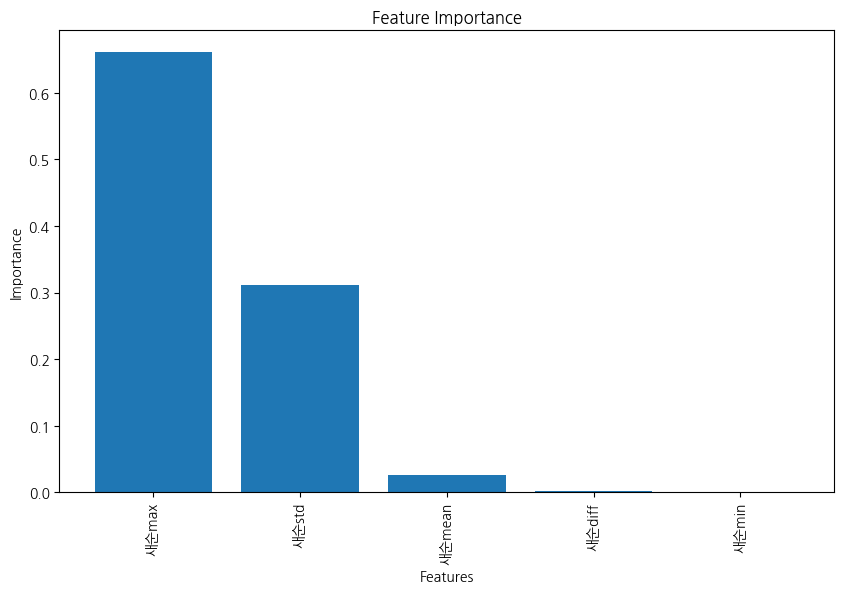

In [ ]:
importances = rfr.feature_importances_

# 피처 이름 가져오기
feature_names = X_s.columns

# 중요도를 내림차순으로 정렬하여 인덱스 얻기
indices = np.argsort(importances)[::-1]

# 바 그래프로 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# 전체통계량 중에서 새순만으로 주성분 분석을 하고 다시 RFR까지 돌려보기.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_s)
X_pca = pca.transform(X_s)
print(pca.explained_variance_ratio_) # 0.99813621

[0.93063633 0.06749988]


In [ ]:
linear(X_pca, y_scaled, 1)

MSE : 1703.301 , RMSE : 41.271
Variance score : 0.965
절편 값: [405.89912756]
회귀 계수값: [98.35, 51.18]


In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
df_pca['target']= y_scaled['착과량(int)']
df_pca.head(3)

,PCA1,PCA2,target
0,2.623983,0.293672,692
1,0.369493,1.528751,534
2,2.015502,0.398056,634


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


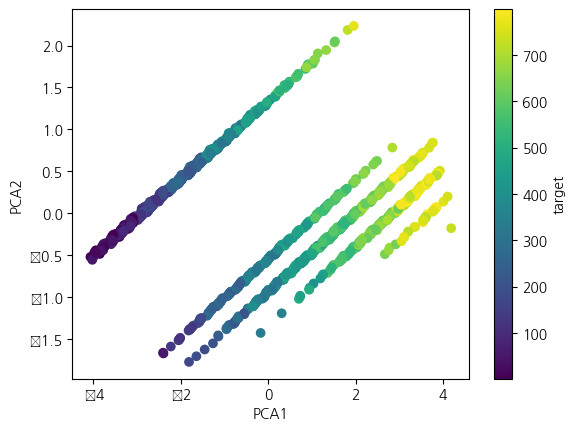

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['target'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='target')
plt.show()

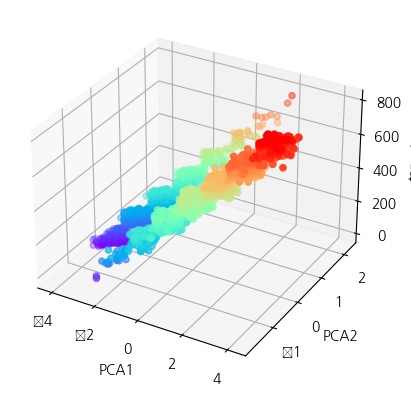

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 주성분 1, 주성분 2, 연속형 종속변수 값 가져오기
pc1 = df_pca['PCA1']
pc2 = df_pca['PCA2']
z = df_pca['target']

# 3D 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(pc1, pc2, z, c=z, cmap='rainbow')

# 축 레이블 설정
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('target')

# 그래프 표시
plt.show()

In [ ]:
# 새순만 RFR을 실행
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=0.3, random_state=3)
y_train = y_train.values.ravel()

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=3)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, pred)

print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))
print('RMSE:', np.sqrt(mse))

Variance score : 0.966
RMSE: 40.95833493202831


In [ ]:
####################################################################

In [ ]:
# 월별통계량에서 정규화
X_sm = X_scaled_month.iloc[:,:15]
X_sm.head()

,9_새순mean,9_새순std,9_새순diff,9_새순min,9_새순max,10_새순mean,10_새순std,10_새순diff,10_새순min,10_새순max,11_새순mean,11_새순std,11_새순diff,11_새순min,11_새순max
0,0.168475,0.568784,1.274715,-1.236115,0.362060,0.295950,0.521623,1.364196,-1.388533,0.342240,0.445251,0.483436,1.294490,0.808606,0.428653
1,0.605676,0.800088,0.581507,-0.625002,0.805248,0.476023,0.601566,0.352204,-0.868129,0.642540,0.538466,0.649746,-0.273725,-1.156704,0.593997
2,0.351309,0.678987,0.928111,-1.032410,0.556750,0.459867,0.652172,0.689535,-1.388533,0.472763,0.569250,0.615434,0.846428,0.481054,0.613767
3,0.128227,0.420137,0.581507,-1.032410,0.262418,0.196842,0.342319,1.026866,-0.868129,0.291684,0.249779,0.236712,1.070459,1.136158,0.236029
4,-0.166183,-0.120814,-0.111701,-0.217593,-0.161562,-0.145792,-0.135245,0.352204,0.172680,-0.148308,-0.177990,-0.200570,0.622398,0.808606,-0.211740


In [ ]:
# 월별통계량 중에서 새순만으로 주성분 분석
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_sm)
X_pca = pca.transform(X_sm)
print(pca.explained_variance_ratio_) # 0.86642427

[0.59447019 0.36666203]


In [ ]:
linear(X_pca, y_scaled, 1)

MSE : 2734.267 , RMSE : 52.290
Variance score : 0.944
절편 값: [405.35578546]
회귀 계수값: [1.46, -90.58]


In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])
df_pca['target']= y_scaled['착과량(int)']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


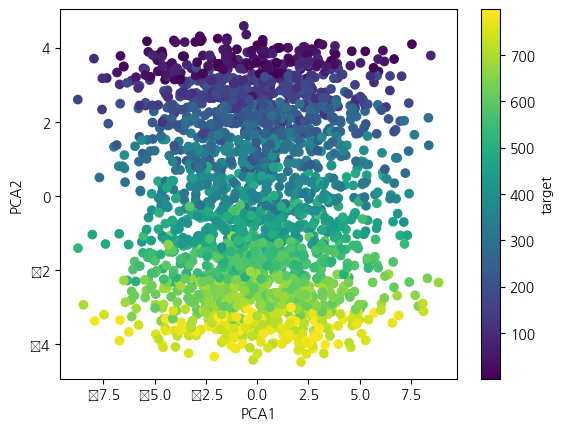

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['target'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='target')
plt.show()

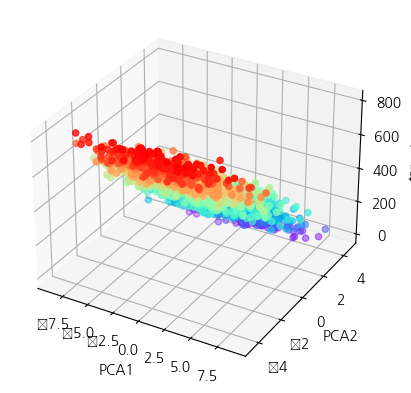

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 주성분 1, 주성분 2, 연속형 종속변수 값 가져오기
pc1 = df_pca['PCA1']
pc2 = df_pca['PCA2']
z = df_pca['target']

# 3D 산점도 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(pc1, pc2, z, c=z, cmap='rainbow')

# 축 레이블 설정
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('target')

# 그래프 표시
plt.show()

In [ ]:
# 새순만 RFR을 실행
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=0.3, random_state=3)
y_train = y_train.values.ravel()

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=3)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, pred)

print('Variance score : {0:.3f}'.format(r2_score(y_test, pred)))
print('RMSE:', np.sqrt(mse))

Variance score : 0.947
RMSE: 50.79818222206138


[0.46581443 0.30450231]

MSE : 2744.004 , RMSE : 52.383
Variance score : 0.944
절편 값: [405.24281559]
회귀 계수값: [98.38, -2.53]



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


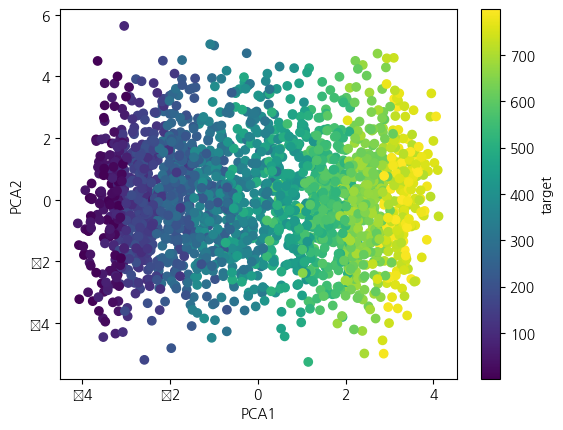

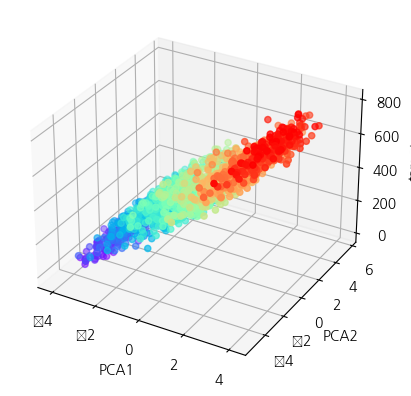

In [ ]:
## 헷갈려 한번에 봐
pcatotal(X_scaled_total)

[0.93063633 0.06749988]

MSE : 1703.301 , RMSE : 41.271
Variance score : 0.965
절편 값: [405.89912756]
회귀 계수값: [98.35, 51.18]



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


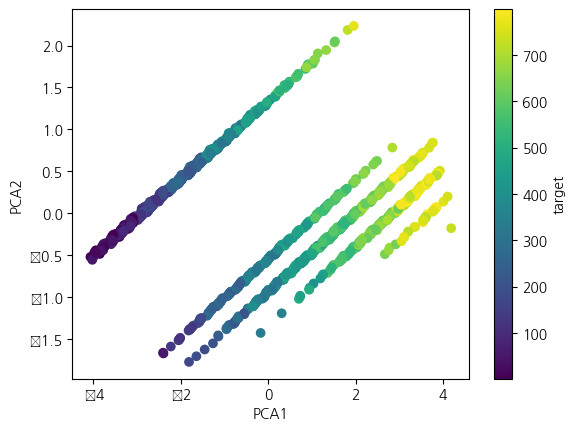

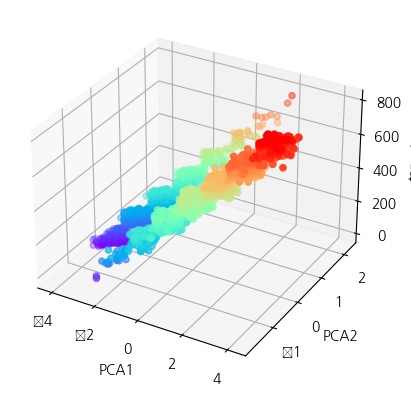

In [ ]:
pcatotal(X_s) 
# 두 개의 선으로 분리된 형태는 데이터가 두 개의 서로 다른 그룹 또는 클래스로 분류되는 경향을 보여줄 수 있습니다. 
# 이는 주성분 분석으로 생성된 새로운 독립변수가 
# 원본 데이터에서 클래스를 구분하기에 충분한 정보를 갖고 있다는 것을 의미할 수 있습니다. 

[0.59482472 0.27159955]

MSE : 2760.501 , RMSE : 52.540
Variance score : 0.943
절편 값: [405.41623589]
회귀 계수값: [0.76, -74.44]



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


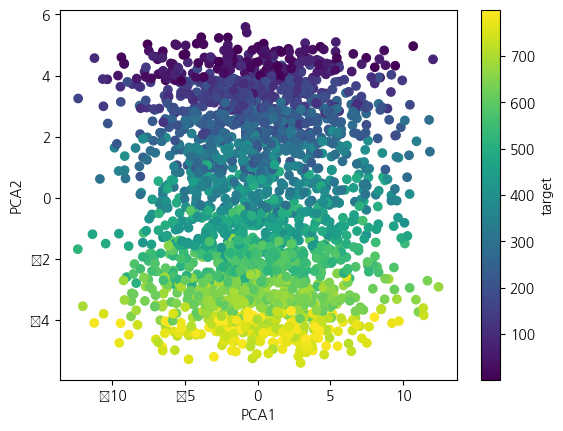

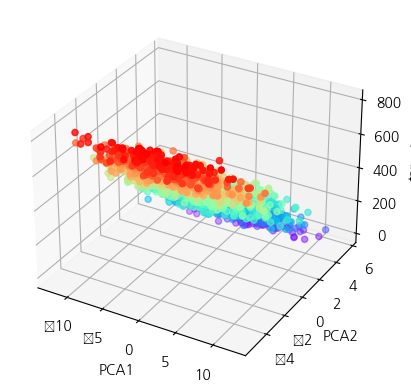

In [ ]:
pcatotal(X_scaled_month)

[0.59447019 0.36666203]

MSE : 2734.267 , RMSE : 52.290
Variance score : 0.944
절편 값: [405.35578546]
회귀 계수값: [1.46, -90.58]



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


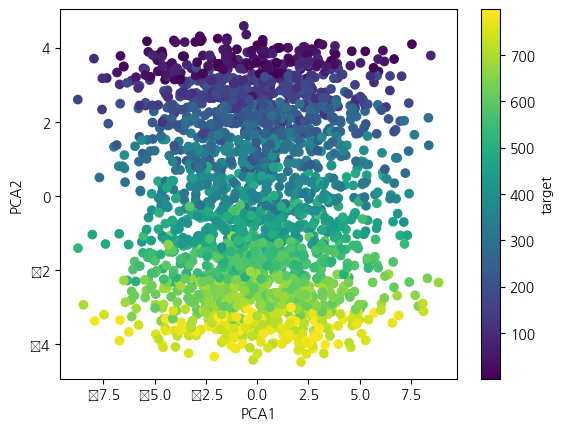

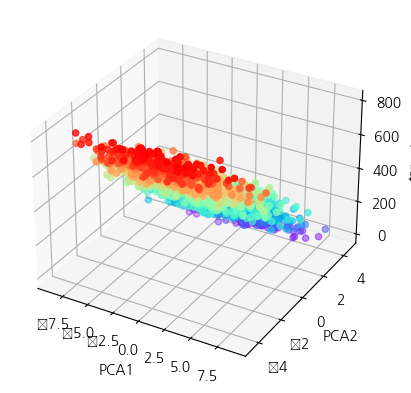

In [ ]:
pcatotal(X_sm)

[0.46581443 0.30450231]

MSE : 2744.004 , RMSE : 52.383
Variance score : 0.944
절편 값: [405.24281559]
회귀 계수값: [98.38, -2.53]



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


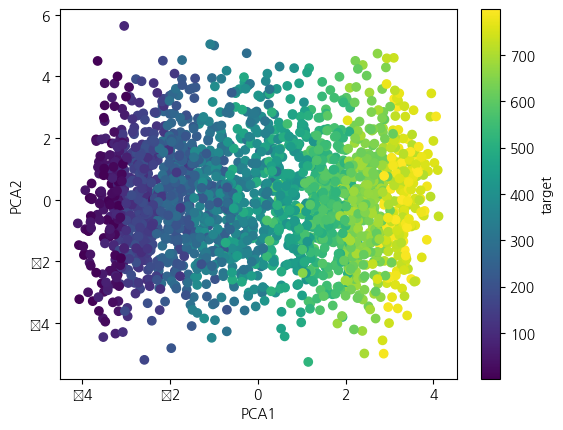

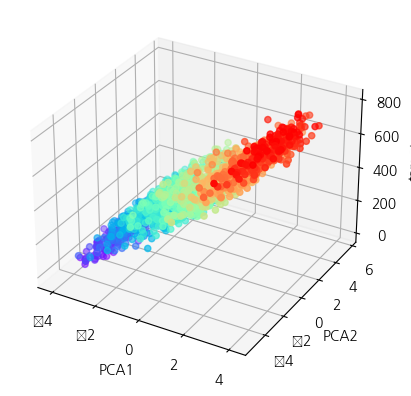

In [ ]:
pcatotal(X_total)

In [ ]:
# 회귀모델에서,
# 1. 나무의 크기나 외형적인 것으로는 착과량을 예측할 수 없다.
# 2. 새순과 엽록소를 독립변수로 착과량을 예측한 모델이 적절함.
# 3. 새순과 엽록소의 통계적인 특성을 변수로 하여 특성공학을 적용하였을 때, 
#    n=1일 때, 가장 회귀모델이 우수하였고, 변수간의 조합은 오히려 모델을 일반화하는데 부적합.
# 4. 모델 score : 전체통계량 >= 월별통계량 > 매일측정한값

# 후속작업 : 주성분분석을 통한 노이즈의 제거가 모델을 더 우수하게 만드는가.
# 우수하다고 알려진 회귀모델 : RandomforestRegressor, XGBoostRegressor가 더 우수한 예측모델을 나타내는가. (다소 좋아지는 것 같다. 다만, 여기에서 또 변수중요도를 통해서 새로운 인사이트를 얻음.)
# 그리드서치, 랜덤서치, 베이지안 최적화 기반의 hyperopt를 이용한 하이퍼파라미터 튜닝을 시도해보고, 하이퍼파라미터튜닝의 기회비용의 적절성을 확인.

In [ ]:
# 주성분 분석으로 두개의 요소만 뽑아도 원래모델의 변동성을 96프로 설명한다.
# 랜덤포레스트회귀분석을 시도했더니, rmse가 감소했음을 확인하였고, 변수중요도를 보았더니, 새순의 최대크기와 새순길이 표준편차의 지표 외에 나머지는 중요하지 않을 수도 있다.
# 결국 엽록소를 측정하는 것의 의미가 퇴색되는지는 후속 분석을 통해 살펴봐야한다.
# 엽록소의 농도는 일조량과 영양상태에 따라 나무의 상태를 나타내는 지표라고 생각했는데 그것이 열매를 맺는데에는 영향력이 없다는 통계적 결론.

# 확인차 수관이라는 외형과 엽록소와의 관계를 보고 나무로부터 얻어질 수 있는 표면적인 지표가 열매성장과는 관련이 없고, 나무자체의 성장에만 영향력이 있다면,
# 더불어 수관지표와 새순지표와의 관계를 보고 나무의 전체성장력과 프랙탈구조의 leaf의 독립성을 검증할 수 있다면 더욱 좋을 것.
# 확실하게 새순과 착과량과의 관계만 봐도 된다고 확정지을 수 있을 것이다. 

In [ ]:
# [도달했으면 하는 결론]
# 새순의 맥스값에 영향을 받는다는 것은, 새순이 크도록 내버려두면 착과량이 감소한다.
# 새순의 표준편차에 영향을 받는다는 것은, 새순의 관리측면에서 큰 새순을 적절한 시기에 솎아내지 못해서 발생하는 새순의 편차가 착과량에 영향을 미친다.

In [ ]:
# Ridge규제 적용

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_scaled_total, y_scaled, test_size = 0.3)

rg = Ridge()

rg.fit(X_train, y_train)
pred_train = rg.predict(X_train)
pred_test  = rg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

훈련   데이터 RMSE : 41.42240873873019
테스트 데이터 RMSE : 42.89546046006658


In [ ]:
model_cv = GridSearchCV(rg, cv=5,
                        param_grid = {
                            'alpha':[0.0001,0.001,0.01,0.1,1],
                            'max_iter':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
                        })
model_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.1, max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})

In [ ]:
best_params = model_cv.best_params_
print("Best parameters:", best_params)

Best parameters: {'alpha': 0.1, 'max_iter': 10}


In [ ]:
# best parameter로 조져봅니다.
rg = Ridge(alpha=0.1, max_iter=100)

rg.fit(X_train, y_train)
pred_train = rg.predict(X_train)
pred_test  = rg.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

훈련   데이터 RMSE : 41.40831023311296
테스트 데이터 RMSE : 42.97262311220689


In [ ]:
# randomforestregressor

In [ ]:
# RFR X_scaled

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled_total, y_scaled, test_size = 0.3)
y_train = y_train.values.ravel()

rft = RandomForestRegressor()
rfr.fit(X_train, y_train)
pred_train = rfr.predict(X_train)
pred_test  = rfr.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

Variance score : 0.980
훈련   데이터 RMSE : 30.886032453541205
Variance score : 0.969
테스트 데이터 RMSE : 39.422926199359736


In [ ]:
# model_cv = GridSearchCV(rfr, cv=5,
#                         param_grid = {
#                             'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#                             'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#                             'max_depth':[3,4,5,6,7,8,9,10],
#                             'n_jobs':[-1]
#                         })
# model_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=3),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                         'n_jobs': [-1]})

In [ ]:
# best_params = model_cv.best_params_
# print("Best parameters:", best_params) # Best parameters: {'criterion': 'poisson', 'max_depth': 6, 'n_estimators': 80, 'n_jobs': -1}

Best parameters: {'criterion': 'poisson', 'max_depth': 6, 'n_estimators': 80, 'n_jobs': -1}


In [ ]:
# best parameter로 조져봅니다.
rfr = RandomForestRegressor(n_estimators=80, criterion='poisson', max_depth=6, n_jobs=-1)

rfr.fit(X_train, y_train)
pred_train = rfr.predict(X_train)
pred_test  = rfr.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

Variance score : 0.979
훈련   데이터 RMSE : 31.95949360329
Variance score : 0.967
테스트 데이터 RMSE : 39.68469464194169


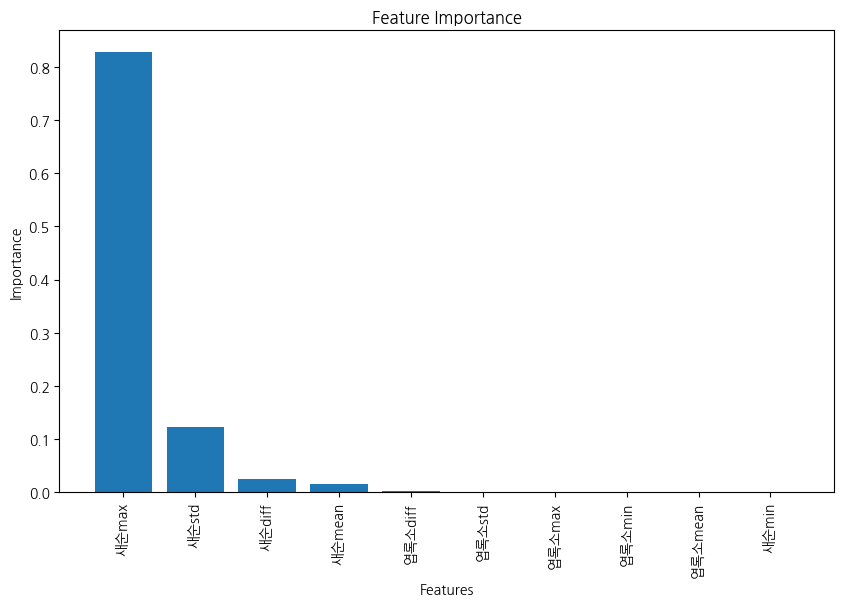

In [ ]:
importances = rfr.feature_importances_

# 피처 이름 가져오기
feature_names = X_scaled_total.columns

# 중요도를 내림차순으로 정렬하여 인덱스 얻기
indices = np.argsort(importances)[::-1]

# 바 그래프로 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
# RFR-Xs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_scaled, test_size = 0.3)
y_train = y_train.values.ravel()

rfr_s = RandomForestRegressor()
rfr_s.fit(X_train, y_train)
pred_train = rfr_s.predict(X_train)
pred_test  = rfr_s.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test)) # 과적합

Variance score : 0.995
훈련   데이터 RMSE : 15.387131504232423
Variance score : 0.963
테스트 데이터 RMSE : 41.79245951032249


In [ ]:
# XGboostRegressor

In [ ]:
import xgboost as xgb
xgbr=xgb.XGBRegressor()

X_train, X_test, y_train, y_test = train_test_split(X_scaled_total, y_scaled, test_size = 0.3)
xgbr.fit(X_train, y_train)
pred_train = xgbr.predict(X_train)
pred_test  = xgbr.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

Variance score : 0.998
훈련   데이터 RMSE : 8.558815218463442
Variance score : 0.964
테스트 데이터 RMSE : 41.41584883642757


In [ ]:
# xgbr_cv=xgb.XGBRegressor()
# param_grid = {
#         'learning_rate':[0.001,0.01,0.05,0.1,0.2],
#         'max_depth':  [2, 3, 4, 5, 6]
#     }

# grid_xgb_cv=GridSearchCV(xgbr_cv,
#                        param_grid=param_grid,
#                        cv=5,
#                        verbose=0,
#                        scoring='neg_root_mean_squared_error',
#                        n_jobs=-1)
# grid_xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# print('최적의 매개변수 조합: ', grid_xgb_cv.best_params_) # 최적의 매개변수 조합:  {'learning_rate': 0.1, 'max_depth': 2}

최적의 매개변수 조합:  {'learning_rate': 0.1, 'max_depth': 2}


In [ ]:
# best parameter로 조져봅니다. (X_scaled_total)
xgb_best = xgb.XGBRegressor(learning_rate=0.1, max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_total, y_scaled, test_size = 0.3)
xgb_best.fit(X_train, y_train)
pred_train = xgb_best.predict(X_train)
pred_test  = xgb_best.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

Variance score : 0.974
훈련   데이터 RMSE : 34.7223193767981
Variance score : 0.971
테스트 데이터 RMSE : 38.065343945972195


In [ ]:
# best parameter로 조져봅니다. (X_s) ## 비교군
xgb_best = xgb.XGBRegressor(learning_rate=0.1, max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(X_s, y_scaled, test_size = 0.3) # 심심해서 X_s를 넣어봄.
xgb_best.fit(X_train, y_train)
pred_train = xgb_best.predict(X_train)
pred_test  = xgb_best.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

Variance score : 0.975
훈련   데이터 RMSE : 34.97277679870343
Variance score : 0.968
테스트 데이터 RMSE : 38.94535049596611


In [ ]:
# best parameter로 조져봅니다. (X_scaled_month) ## 비교군
xgb_best = xgb.XGBRegressor(learning_rate=0.1, max_depth=2)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_month, y_scaled, test_size = 0.3) # 심심해서 X_s를 넣어봄.
xgb_best.fit(X_train, y_train)
pred_train = xgb_best.predict(X_train)
pred_test  = xgb_best.predict(X_test)
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('Variance score : {0:.3f}'.format(r2_score(y_train, pred_train)))
print('훈련   데이터 RMSE :', np.sqrt(MSE_train))
print('Variance score : {0:.3f}'.format(r2_score(y_test, pred_test)))
print('테스트 데이터 RMSE :', np.sqrt(MSE_test))

Variance score : 0.969
훈련   데이터 RMSE : 38.314932377274445
Variance score : 0.963
테스트 데이터 RMSE : 41.989207607568765
